In [59]:
!nvidia-smi  

Tue Oct  1 23:13:18 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 556.13                 Driver Version: 556.13         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   61C    P0             20W /   95W |       0MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [60]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [61]:
torch.__version__

'2.3.0'

In [62]:
#Scalars
    #ndim = 0
scalar = torch.tensor(7)
print(scalar)
print(scalar.ndim)
print(scalar.item())
print(scalar.dtype)

tensor(7)
0
7
torch.int64


In [63]:
#Vector
    #ndim = 1
    #shape = array size
vector = torch.tensor((7,7))
print(vector)
print(vector.ndim)
print(vector.shape)

tensor([7, 7])
1
torch.Size([2])


In [64]:
#matrix
    #ndim = 2
    #shape = row, col
MATRIX = torch.tensor( [[7,8],[9,10]])
print(MATRIX)
print(MATRIX.ndim)
print(MATRIX.shape)

tensor([[ 7,  8],
        [ 9, 10]])
2
torch.Size([2, 2])


In [65]:
#tensor
    #ndim > 2
    #shape
TENSOR = torch.tensor( [[ [1,2,3],[4,5,6] ], [ [7,8,9],[10,11,12]] ])
print(TENSOR)
print(TENSOR.ndim)
print(TENSOR.shape)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])
3
torch.Size([2, 2, 3])


In [66]:
#Random Tensor
print(torch.rand(3,4))
print(torch.rand(size=(3,4)))

tensor([[0.4514, 0.0179, 0.9615, 0.9777],
        [0.1247, 0.1697, 0.7914, 0.2555],
        [0.9082, 0.1525, 0.0175, 0.6866]])
tensor([[0.0705, 0.2933, 0.9574, 0.6566],
        [0.0994, 0.7095, 0.2008, 0.1094],
        [0.3602, 0.7010, 0.8705, 0.2519]])


In [67]:
#01 Tensor
print(torch.zeros(2,3))
print(torch.ones(2,4))

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [68]:
print(torch.arange(0,10))
print(torch.arange(start=0,end=10,step=2))
print(torch.zeros_like(input=torch.arange(0,10)))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([0, 2, 4, 6, 8])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [69]:
tensorInt = torch.tensor([3,5,6],
                   dtype=None,      # float32/float float64/double  float16/half (default)
                   device="cpu",     # "cpu"  "cuda"  None
                   requires_grad=False) #
print(tensorInt)
print(tensorInt.dtype)

tensor([3, 5, 6])
torch.int64


In [70]:
print(tensorInt.type(torch.float16))

tensor([3., 5., 6.], dtype=torch.float16)


### Tensor Operations
    1. Add
    2. Sub  
    3. Multiply 
    4. Div
    5. Matrix Multiplication

In [71]:
tensor = torch.tensor([1,2,3])
print(tensor + 10)
print(torch.add(tensor,10))

tensor([11, 12, 13])
tensor([11, 12, 13])


In [72]:
print(tensor * 10)
print(torch.mul(tensor,10))

tensor([10, 20, 30])
tensor([10, 20, 30])


In [73]:
tensor / 10

tensor([0.1000, 0.2000, 0.3000])

In [74]:
#Hadamard Product
tensor * tensor

tensor([1, 4, 9])

In [75]:
# Dot Product or matrix Multiplication
torch.matmul(tensor,tensor)

tensor(14)

In [76]:
%%time
torch.matmul(torch.rand(100,100,100),torch.rand(100,100,100))
print("Time")

Time
CPU times: total: 0 ns
Wall time: 14.5 ms


In [77]:
w = torch.rand(size=(3,4), requires_grad=True)
x = torch.rand(size=(4,5))
b = torch.rand(size=(3,5), requires_grad=True)
y = torch.matmul(w,x) + b
print(y)

tensor([[0.6461, 0.7988, 0.5537, 0.7409, 0.5308],
        [1.9479, 1.4738, 1.4218, 1.5138, 1.5167],
        [0.5579, 0.1651, 0.6141, 0.6592, 0.9074]], grad_fn=<AddBackward0>)


In [78]:
# y.backward()
# print(x.grad)   #dy/dx
# print(w.grad)   #dy/dw
# print(b.grad)   #dy/db

In [79]:
w = torch.rand(1, requires_grad=True)
x = torch.rand(1)
b = torch.rand(1, requires_grad=True)
y = w * x + b
print(y)

tensor([0.6877], grad_fn=<AddBackward0>)


In [80]:
y.backward()
print(x.grad)   #dy/dx
print(w.grad)   #dy/dw
print(b.grad)   #dy/db

None
tensor([0.5700])
tensor([1.])


### Numpy and OpenCV and Pandas

In [81]:
x_np = np.random.rand(3)
print(x_np)

[0.88470655 0.47054139 0.19236107]


In [82]:
print(torch.from_numpy(x_np))   #no copy
print(torch.tensor(x_np))       #copy

tensor([0.8847, 0.4705, 0.1924], dtype=torch.float64)
tensor([0.8847, 0.4705, 0.1924], dtype=torch.float64)


In [83]:
print(torch.rand(3,5).numpy())

[[0.524692   0.43429244 0.3948334  0.59290016 0.02641702]
 [0.274615   0.00433534 0.5182861  0.45622802 0.00395507]
 [0.13385111 0.12794697 0.06631756 0.72735643 0.14970595]]


### Linear Regression

In [84]:
import numpy as np
import torch

In [85]:
inputs = np.array([[73, 67, 43],
                    [91,88,64],
                    [87,134,58],
                    [102,43,37],
                    [69,96,70]], dtype='float32')

targets = np.array( [[56, 70],
                     [81, 101],
                     [119, 133],
                     [22, 37],
                     [103, 119]], dtype='float32')

In [86]:
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)

In [87]:
w = torch.randn(2,3, requires_grad=True)        #normal Distribution value
b = torch.randn(2, requires_grad=True)

y = x * w.T + b

In [88]:
def model(x):
    return x @ w.t() + b

In [89]:
preds = model(inputs)
print(preds)
print(targets)

tensor([[-31.8119,  -9.9468],
        [-44.0421, -10.5876],
        [-85.3140,  22.7213],
        [ -0.1131, -42.7217],
        [-59.2617,   7.4201]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [90]:
def mse(t1,t2):
    diff = t1 - t2                                  #diff is a matrix
    return torch.sum(diff * diff)/ diff.numel()     #numel gives no of element

In [91]:
loss = mse(preds,targets)
print(loss)

tensor(14171.8799, grad_fn=<DivBackward0>)


In [92]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ -9803.2021, -12158.6328,  -7161.0640],
        [ -8283.0928,  -8818.6387,  -5547.1562]])
tensor([-120.3086,  -98.6229])


In [93]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [94]:
with torch.no_grad():           #indicate Pytorch to not to track, calculate or modify gradients while updating the weights and bias
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()


In [95]:
#Multiple Epochs
for i in range(40000):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [96]:
print(model(inputs))
print(targets)

tensor([[ 57.2954,  70.0155],
        [ 82.1252, 100.8542],
        [118.6719, 133.0064],
        [ 21.0649,  37.0523],
        [101.9414, 119.0906]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


Built-in Linear Regression

In [97]:
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

In [98]:
train_ds = TensorDataset(inputs,targets)        # ([[x]], [[y]])
print(train_ds)
print(train_ds[0:3])

(tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.]]))


In [99]:
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)   #shuffle data before creating batches
print(train_dl)

In [100]:
batch_num = 1
for xb, yb in train_dl:
    print("Batch:",batch_num)
    batch_num+=1
    print(xb)
    print(yb)

Batch: 1
tensor([[69., 96., 70.],
        [91., 88., 64.]])
tensor([[103., 119.],
        [ 81., 101.]])
Batch: 2
tensor([[102.,  43.,  37.],
        [ 73.,  67.,  43.]])
tensor([[22., 37.],
        [56., 70.]])
Batch: 3
tensor([[ 87., 134.,  58.]])
tensor([[119., 133.]])


In [101]:
model = nn.Linear(3, 2)          # 3inputs 2outputs
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.5732, -0.1160, -0.0963],
        [-0.2861, -0.0956, -0.5450]], requires_grad=True)
Parameter containing:
tensor([0.4353, 0.3258], requires_grad=True)


In [102]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.5732, -0.1160, -0.0963],
         [-0.2861, -0.0956, -0.5450]], requires_grad=True),
 Parameter containing:
 tensor([0.4353, 0.3258], requires_grad=True)]

In [103]:
preds = model(inputs)
print(preds)

tensor([[-53.3246, -50.3943],
        [-68.1018, -68.9949],
        [-70.5679, -68.9774],
        [-66.5853, -53.1267],
        [-56.9972, -66.7358]], grad_fn=<AddmmBackward0>)


In [104]:
loss_fn = F.mse_loss

In [105]:
?F.mse_loss         #Documentation

Object `F.mse_loss         #Documentation` not found.


In [106]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(23037.4199, grad_fn=<MseLossBackward0>)


In [107]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)          #single grad update (calculate grad and update the w,b)
#model.parameters is passed to know which parameters should be modified

In [108]:
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb, yb in train_dl:
            preds = model(xb)
            loss = loss_fn(preds,yb)            #loss is a tensor although scalar tensor
            loss.backward()
            opt.step()
            opt.zero_grad()
        if(epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss:{:.4f}'.format(epoch+1,num_epochs, loss.item()))

In [109]:
fit(1000, model, loss_fn, opt)

Epoch [10/1000], Loss:18.6932
Epoch [20/1000], Loss:27.6123
Epoch [30/1000], Loss:271.0341
Epoch [40/1000], Loss:24.0920
Epoch [50/1000], Loss:10.3392
Epoch [60/1000], Loss:142.9062
Epoch [70/1000], Loss:22.0425
Epoch [80/1000], Loss:18.6170
Epoch [90/1000], Loss:3.6557
Epoch [100/1000], Loss:33.6664
Epoch [110/1000], Loss:32.0683
Epoch [120/1000], Loss:2.1226
Epoch [130/1000], Loss:89.0285
Epoch [140/1000], Loss:64.5280
Epoch [150/1000], Loss:68.9641
Epoch [160/1000], Loss:9.2573
Epoch [170/1000], Loss:2.7058
Epoch [180/1000], Loss:5.1989
Epoch [190/1000], Loss:1.4191
Epoch [200/1000], Loss:49.9690
Epoch [210/1000], Loss:13.5382
Epoch [220/1000], Loss:2.4072
Epoch [230/1000], Loss:1.7551
Epoch [240/1000], Loss:36.2919
Epoch [250/1000], Loss:1.9631
Epoch [260/1000], Loss:40.1589
Epoch [270/1000], Loss:1.9021
Epoch [280/1000], Loss:1.2994
Epoch [290/1000], Loss:26.2048
Epoch [300/1000], Loss:0.8782
Epoch [310/1000], Loss:5.9640
Epoch [320/1000], Loss:4.1876
Epoch [330/1000], Loss:0.9185

### MNIST

In [110]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [111]:
dataset = MNIST(root='data/', download=True)

In [112]:
len(dataset)

60000

In [113]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [114]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [115]:
# %matplotlib inline      #Magic commands of Jupyter

5


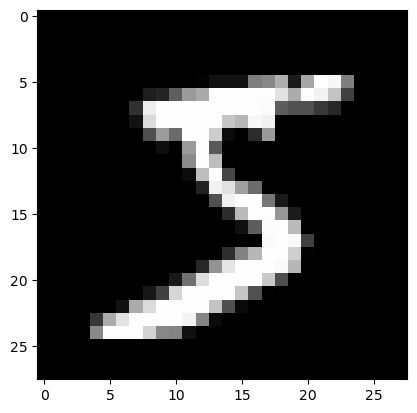

In [116]:
image, label = dataset[0]
plt.imshow(image, cmap='grey')
print(label)

In [117]:
import torchvision.transforms as transforms     #to transform loaded image to array / tensor

In [118]:
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [119]:
img_tensor, label = dataset[0]
print(img_tensor.shape)
print(label)

torch.Size([1, 28, 28])
5


In [120]:
print(img_tensor[:,10:15,10:15])        #matplotlib last dim as channel #pytorch 1st dim as channel
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


In [121]:
def split_indices(n, val_pct):
    n_val = int(val_pct*n)
    idxs = np.random.permutation(n)             #generates an array of 0 to n-1 then permutate
    return idxs[n_val:], idxs[:n_val]

In [122]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [123]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [124]:
batch_size = 100
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                        batch_size,
                        sampler = val_sampler)

In [125]:
import torch.nn as nn
input_size = 28 * 28
num_classes = 10

In [126]:
model = nn.Linear(input_size, num_classes)      #input, neuron_count

In [127]:
model.weight

Parameter containing:
tensor([[-0.0004, -0.0263, -0.0222,  ...,  0.0232, -0.0252,  0.0234],
        [-0.0237, -0.0034, -0.0262,  ...,  0.0074, -0.0034, -0.0345],
        [ 0.0057, -0.0247,  0.0080,  ...,  0.0341,  0.0139, -0.0183],
        ...,
        [ 0.0031, -0.0068,  0.0333,  ...,  0.0231, -0.0210, -0.0114],
        [ 0.0152, -0.0066, -0.0084,  ...,  0.0138, -0.0297, -0.0104],
        [ 0.0126, -0.0064, -0.0085,  ..., -0.0041,  0.0133, -0.0109]],
       requires_grad=True)

In [128]:
model.bias

Parameter containing:
tensor([-0.0053, -0.0057, -0.0321, -0.0264, -0.0320, -0.0057, -0.0321, -0.0084,
         0.0071,  0.0328], requires_grad=True)

In [129]:
for x, y in train_loader:
    print(x.shape)
    print(y.shape)
    # output = model(x)
    break

torch.Size([100, 1, 28, 28])
torch.Size([100])


In [130]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1,28*28)       #-1 means pytorch adjust the value itself #here 100 (batchsize)
        out = self.linear(xb)
        return out

model = MnistModel()

In [138]:
for x ,y in train_loader:
    output = model(x)
    break

In [139]:
import torch.nn.functional as F

In [140]:
print(output[:2])
print(torch.sum(output[1:2]).item()) 

probs = F.softmax(output, dim=1)

print(probs[:2].data)
print(torch.sum(probs[1:2].data).item())

tensor([[-0.1960, -0.0460,  0.2513, -0.0419,  0.0933, -0.0721, -0.1069, -0.1306,
         -0.2207, -0.1757],
        [-0.0373, -0.1742,  0.2405,  0.1763,  0.1195, -0.0065, -0.2064, -0.1168,
         -0.2115, -0.3457]], grad_fn=<SliceBackward0>)
-0.5620909333229065
tensor([[0.0868, 0.1009, 0.1358, 0.1013, 0.1160, 0.0983, 0.0949, 0.0927, 0.0847,
         0.0886],
        [0.1003, 0.0874, 0.1324, 0.1241, 0.1173, 0.1034, 0.0847, 0.0926, 0.0842,
         0.0737]])
1.0


In [146]:
max_probs, preds = torch.max(probs, dim=1)
print(max_probs)
print(preds)

tensor([0.1358, 0.1324, 0.1334, 0.1374, 0.1193, 0.1369, 0.1248, 0.1311, 0.1299,
        0.1279, 0.1198, 0.1444, 0.1247, 0.1299, 0.1287, 0.1266, 0.1193, 0.1759,
        0.1581, 0.1380, 0.1300, 0.1436, 0.1308, 0.1635, 0.1312, 0.1297, 0.1329,
        0.1259, 0.1282, 0.1633, 0.1280, 0.1272, 0.1328, 0.1474, 0.1230, 0.1180,
        0.1273, 0.1438, 0.1282, 0.1345, 0.1404, 0.1297, 0.1220, 0.1424, 0.1389,
        0.1500, 0.1489, 0.1239, 0.1215, 0.1317, 0.1420, 0.1431, 0.1188, 0.1155,
        0.1158, 0.1442, 0.1131, 0.1247, 0.1457, 0.1333, 0.1319, 0.1412, 0.1248,
        0.1439, 0.1145, 0.1167, 0.1319, 0.1521, 0.1413, 0.1389, 0.1162, 0.1300,
        0.1458, 0.1315, 0.1310, 0.1160, 0.1344, 0.1351, 0.1275, 0.1361, 0.1367,
        0.1374, 0.1303, 0.1197, 0.1516, 0.1246, 0.1241, 0.1266, 0.1218, 0.1625,
        0.1204, 0.1102, 0.1430, 0.1180, 0.1460, 0.1229, 0.1168, 0.1241, 0.1242,
        0.1349], grad_fn=<MaxBackward0>)
tensor([2, 2, 4, 2, 4, 2, 2, 7, 2, 5, 1, 2, 2, 2, 2, 4, 5, 2, 4, 2, 2, 5, 4, 4,

In [147]:
def accuracy(l1,l2): 
    return torch.sum(l1 == l2).item() / len(l1)         #no differentiation possible

In [148]:
accuracy(preds,y)

0.07

In [149]:
loss_fn = F.cross_entropy       #performs softmax internally + cross entropy loss
loss = loss_fn(output,y)
print(loss)                     # e^(-loss) is the accuracy %

tensor(2.3561, grad_fn=<NllLossBackward0>)


In [150]:
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr= lr)

In [151]:
def loss_batch(model, loss_func, xb, yb, opt = None, metric = None):
    preds = model(xb)
    loss = loss_func(preds,yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    metric_result = None
    if metric is not None:
        metric_result = metric(preds, yb)

    return loss.item(), len(xb), metric_result

In [152]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        results = [loss_batch(model,loss_fn,xb,yb,metric=metric)     for xb,yb in valid_dl]
        losses, nums, metrics = zip(*results)
        total = np.sum(nums)
        avg_loss = np.sum(np.multiply(losses,nums)) / total
        avg_metric = None 
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics,nums)) / total
    return avg_loss, total, avg_metric

In [154]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

DEEP NEURAL NETWORK

In [155]:
class MnistModel(nn.Module):
    def __init__():
        super().__init__()
        self.linear1 = nn.Linear(in_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, out_size)
    
    def forward(self,xb):
        xb = xb.view(xb.size(0),-1)
        out = self.linear1(xb)
        out = F.relu(out)
        out = self.linear2(out)
        return out

In [157]:
# model = nn.Sequential(nn.Linear(n_input, n_hidden),
#                       nn.ReLU(),
#                       nn.Linear(n_hidden, n_out),
#                       nn.Sigmoid())

In [ ]:
# losses = []
# for epoch in range(5000):
#     pred_y = model(data_x)
#     loss = loss_function(pred_y, data_y)
#     losses.append(loss.item())

#     loss.backward()
#     optimizer.step()
#     model.zero_grad()